In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from tensorflow.keras.models import load_model

In [49]:
# آماده‌سازی داده‌ها
data = pd.read_excel('Book5.xlsx')

In [80]:
# ورودی x
# خروجی y

X = data[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
# X = data[['phase','student_level']]
y = data['task_variant']

In [81]:
# تبدیل برچسب‌ها به مقادیر عددی
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [82]:
# نرمال‌سازی داده‌های ورودی
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [83]:
# تبدیل داده‌ها به فرمت numpy
X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(-1, 1)

In [84]:
#  تقسیم داده‌ها به داده‌های آموزشی و آزمایشی
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
del model

In [101]:
# ساخت و آموزش مدل RNN

model = Sequential()
model.add(SimpleRNN(200, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.3)) 
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(200, activation='relu'))
model.add(Dense(3, activation='softmax'))  

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# اضافه کردن EarlyStopping برای جلوگیری از overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=1500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# ذخیره مدل
model.save('modelProRNN.h5')

Epoch 1/1500


C:\Users\parspooya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5938 - loss: 0.8295 - val_accuracy: 0.7550 - val_loss: 0.5303
Epoch 2/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7752 - loss: 0.5186 - val_accuracy: 0.7163 - val_loss: 0.5825
Epoch 3/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7874 - loss: 0.4778 - val_accuracy: 0.8037 - val_loss: 0.4362
Epoch 4/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8267 - loss: 0.4026 - val_accuracy: 0.8381 - val_loss: 0.3680
Epoch 5/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8497 - loss: 0.3574 - val_accuracy: 0.8838 - val_loss: 0.2849
Epoch 6/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8814 - loss: 0.2975 - val_accuracy: 0.8850 - val_loss: 0.2803
Epoch 7/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8785 - loss: 0.2807 - val_accuracy: 0.9000 - val_loss: 0.2367
Epoch 8/1500
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9028 - loss: 0.2314 - val_accuracy:

In [102]:
# ارزیابی مدل
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = y_test.flatten()

accuracy = accuracy_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted') 
precision = precision_score(y_test_classes, y_pred_classes, average='weighted') 
recall = recall_score(y_test_classes, y_pred_classes, average='weighted') 

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%\n")
print(f"Confusion Matrix:\n{conf_matrix}\n")
print(f"Classification Report:\n{class_report}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 96.15%
F1 Score: 96.13%
Precision: 96.14%
Recall: 96.15%

Confusion Matrix:
[[985  22   0]
 [ 30 540  17]
 [  0   8 398]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1007
           1       0.95      0.92      0.93       587
           2       0.96      0.98      0.97       406

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



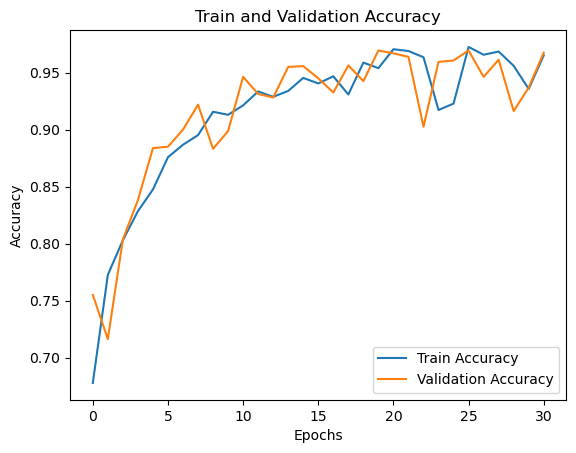

In [103]:
# نمایش تاریخچه آموزش مدل
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')
plt.show()

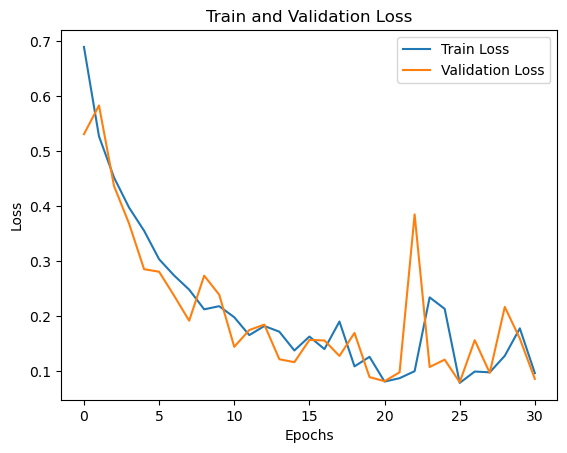

In [104]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()

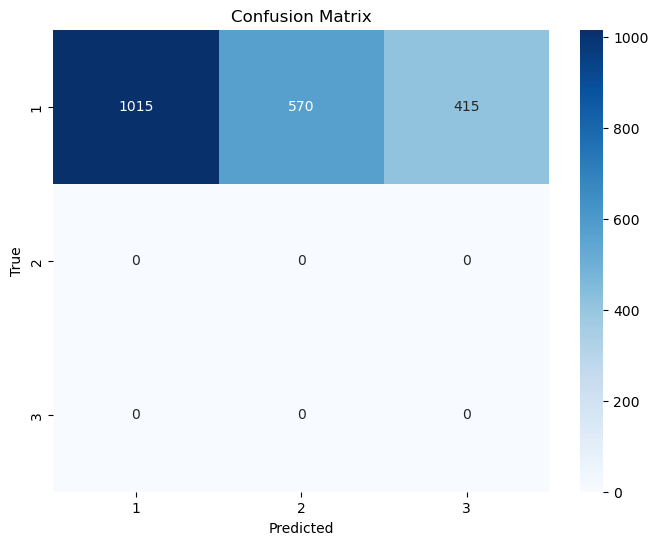

In [105]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [106]:
# بارگذاری مدل
loaded_model = load_model('modelProRNN.h5')

# استفاده از مدل بارگذاری‌شده برای پیش‌بینی
XTest2 = data_test[['p1','k1','s1','t1','a1','p2','k2','s2','t2','a2','p3','k3','s3','t3','a3','p4','k4','s4','t4','a4','p5','k5','s5','t5','a5'
]]
loaded_model.predict(XTest2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [1.14247319e-03, 2.61163426e-04, 9.98596370e-01],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [1.00000000e+00, 5.00566664e-08, 2.04765591e-08],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [8.44363822e-04, 2.01090050e-04, 9.98954535e-01],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99996901e-01, 2.99486919e-06, 8.43324415e-08],
       [1.00000000e+00, 5.00566664e-08, 2.04765591e-08],
       [9.99986887e-01, 1.28909833e-05, 1.87686169e-07],
       [9.99999046e-01, 7.75411536e-07, 1.26708429e-07],
       [9.99986887e-01, 1.28909

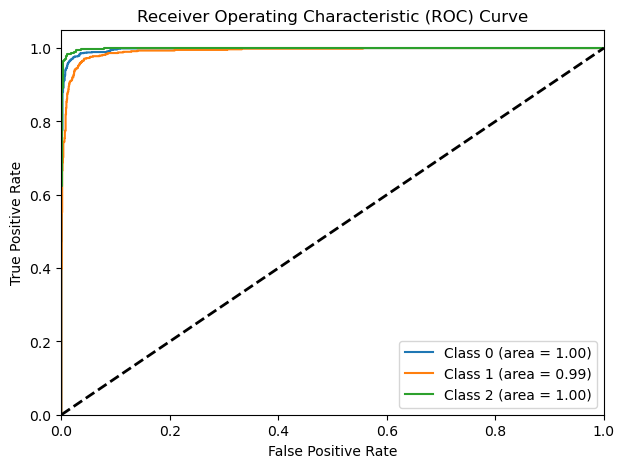

In [107]:
# رسم نمودار AUC و ROC
n_classes = 3

# محاسبه ROC و AUC برای هر کلاس
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(7, 5))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
